## 5차시 과제

**Q1. Target Encoding의 문제점을 서술하고, 이를 극복하기 위한 방법을 찾아 작성해주세요. (15점)**

In [63]:
# 특성에 target 값이 반영되어 있기 때문에, 오버피팅이 발생하기 쉽다.

#1)  Prior Probablity for Regularisation ( Smoothing )   

하나의 label에 하나의 mean값만 사용하기 때문에 오버피팅의 문제점 발생. 따라서 치우쳐진 평균을 전체 평균에 가깝도록 해주면서 규제를 가해줌



#2) K-Fold Regulation for Regularisation ( CV loop )   

예측값에 대한 정보가 들어가 data leakage 문제가 발생. 따라서 이 모델을 사용해 data leakage를 줄이고, 이전보다 label 값에 따른 인코딩 값을 fold 수만큼 더 다양하게 만들어 규제를 더해줌



#3) Expanding Mean Regularisation  

label 당 인코딩 되는 값을 더욱 많이 만드는 방법으로, 더욱 다양하게 해서 트라가 더 잘 학습할 수 있게 해줌  

**Q2. Grid Search와 Random Search의 차이점을 서술하고, 하이퍼 파라미터 튜닝에서 두 방법을 모두 이용한다면 어떠한 방식으로 이용할지 작성해주세요. (12점)**  
ex. Grid Search와 Random Search의 차이점은 ...이고, 만약 둘 다 이용한다면 ..를 먼저 사용하여 ...을 하고 그 후 ...을 사용하여 ...합니다.

In [64]:
# random search은 grid seach과 범위 내에서 랜덤으로 조합을 시험하고, 최적 파라미터를 먼저 찾을 수 있다.
#둘다 사용한다면 random search를 먼저 사용하고, grid search를 사용한다

## 배운 내용을 활용하여 자유롭게 데이터 전처리, 모델 학습을 시키고 아래의 빈칸을 채워주세요.

### 자전거 수요 예측 데이터
    * year, month, day, hour
    * season: 계절
    * holiday: 1=주말을 제외한 국경일 등의 휴일, 0=휴일이 아닌 날
    * workingday: 1=주말 및 휴일이 아닌 주중, 0=주말 및 휴일
    * weather: 날씨
    * temp: 온도(섭씨)
    * atemp: 체감온도(섭씨)
    * humidity: 상대습도
    * windspeed: 풍속
    * registered: 사전에 등록된 사용자가 대여한 횟수
    * count: 대여 횟수 (target)

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import klib

#ignore warningss
import warnings
warnings.filterwarnings('ignore')

In [345]:
import pandas as pd

train_df = pd.read_csv('./data/bike_train.csv').copy()
test_df = pd.read_csv('./data/bike_test.csv').copy()

display( train_df, test_df )

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,count
0,2012,3,13,18,봄,0,1,"맑음, 약간 구름 낀 흐림",28.70,31.820,34.0,19.9995,638,734
1,2012,4,16,22,여름,1,0,"맑음, 약간 구름 낀 흐림",27.88,31.820,51.0,16.9979,179,214
2,2011,12,9,21,겨울,0,1,"맑음, 약간 구름 낀 흐림",12.30,16.665,75.0,0.0000,131,140
3,2011,8,8,19,가을,0,1,"맑음, 약간 구름 낀 흐림",33.62,37.120,43.0,7.0015,352,416
4,2011,10,4,7,겨울,0,1,"맑음, 약간 구름 낀 흐림",17.22,21.210,82.0,19.0012,298,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,2011,1,15,0,봄,0,0,"맑음, 약간 구름 낀 흐림",7.38,12.120,55.0,0.0000,25,28
7616,2011,8,1,11,가을,0,1,"맑음, 약간 구름 낀 흐림",36.08,38.635,32.0,11.0014,66,119
7617,2012,2,5,22,봄,0,0,"맑음, 약간 구름 낀 흐림",10.66,13.635,60.0,7.0015,182,191
7618,2012,12,13,12,겨울,0,1,"맑음, 약간 구름 낀 흐림",14.76,16.665,40.0,16.9979,252,282


,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered
0,2011,10,7,20,겨울,0,1,"맑음, 약간 구름 낀 흐림",22.14,25.760,49.0,0.0000,167
1,2011,4,4,14,여름,0,1,"안개, 안개 + 흐림",30.34,32.575,27.0,32.9975,76
2,2012,2,18,7,봄,0,0,"맑음, 약간 구름 낀 흐림",9.84,14.395,70.0,0.0000,33
3,2012,5,12,3,여름,0,0,"맑음, 약간 구름 낀 흐림",19.68,23.485,59.0,0.0000,20
4,2012,5,12,6,여름,0,0,"맑음, 약간 구름 낀 흐림",17.22,21.210,67.0,6.0032,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,2012,11,15,6,겨울,0,1,"안개, 안개 + 흐림",12.30,14.395,65.0,16.9979,146
3262,2011,4,15,21,여름,1,0,"안개, 안개 + 흐림",16.40,20.455,76.0,19.9995,77
3263,2011,10,9,11,겨울,0,0,"맑음, 약간 구름 낀 흐림",25.42,31.060,53.0,6.0032,234
3264,2011,12,7,18,겨울,0,1,"가벼운 눈, 가벼운 비 + 천둥",16.40,20.455,NaN,19.9995,48


**Q3. 결측치가 있는지 확인하고 있다면 원하는 방식으로 처리하고 왜 그렇게 처리했는지 이유를 서술하세요. (8점)** 

In [346]:
# 단일 대체법을 사용할 경우, 대체된 값이 임의의 오차를 가지므로 실제 현상과 차이가 크게 날 수 있다는 단점이 있다.
#ex) 중앙값 대체, 평균값 대체 등
# 따라서 이를 보완한 다중대체법으로 세가지 결측치들을 대체해주었다

In [347]:
print('train data 결측치 비율 \n')

for col in train_df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * train_df[col].isnull().sum() / train_df[col].shape[0])
    print(msg)

train data 결측치 비율 

column:       year	 Percent of NaN value: 0.00%
column:      month	 Percent of NaN value: 0.00%
column:        day	 Percent of NaN value: 0.00%
column:       hour	 Percent of NaN value: 0.00%
column:     season	 Percent of NaN value: 0.00%
column:    holiday	 Percent of NaN value: 0.00%
column: workingday	 Percent of NaN value: 0.00%
column:    weather	 Percent of NaN value: 0.00%
column:       temp	 Percent of NaN value: 0.43%
column:      atemp	 Percent of NaN value: 2.65%
column:   humidity	 Percent of NaN value: 1.21%
column:  windspeed	 Percent of NaN value: 0.00%
column: registered	 Percent of NaN value: 0.00%
column:      count	 Percent of NaN value: 0.00%


In [348]:
print('test data 결측치 비율 \n')
for col in test_df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * test_df[col].isnull().sum() / test_df[col].shape[0])
    print(msg)

test data 결측치 비율 

column:       year	 Percent of NaN value: 0.00%
column:      month	 Percent of NaN value: 0.00%
column:        day	 Percent of NaN value: 0.00%
column:       hour	 Percent of NaN value: 0.00%
column:     season	 Percent of NaN value: 0.00%
column:    holiday	 Percent of NaN value: 0.00%
column: workingday	 Percent of NaN value: 0.00%
column:    weather	 Percent of NaN value: 0.00%
column:       temp	 Percent of NaN value: 0.67%
column:      atemp	 Percent of NaN value: 3.34%
column:   humidity	 Percent of NaN value: 0.95%
column:  windspeed	 Percent of NaN value: 0.00%
column: registered	 Percent of NaN value: 0.00%


### 다중대체

In [349]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        7620 non-null   int64  
 1   month       7620 non-null   int64  
 2   day         7620 non-null   int64  
 3   hour        7620 non-null   int64  
 4   season      7620 non-null   object 
 5   holiday     7620 non-null   int64  
 6   workingday  7620 non-null   int64  
 7   weather     7620 non-null   object 
 8   temp        7587 non-null   float64
 9   atemp       7418 non-null   float64
 10  humidity    7528 non-null   float64
 11  windspeed   7620 non-null   float64
 12  registered  7620 non-null   int64  
 13  count       7620 non-null   int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 833.6+ KB


In [350]:
train_copy = train_df.copy()
train_copy.drop(['count','season', 'weather'], axis = 1, inplace = True)
test_copy = test_df.copy()
test_copy.drop(['season', 'weather'], axis = 1, inplace = True)

In [351]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform')
value = imputer.fit_transform(train_copy)
train_copy = pd.DataFrame(columns = train_copy.columns, data = value)

In [352]:
#원본 데이터에 결측치 처리
train_df['temp'] = train_copy['temp']
train_df['atemp'] = train_copy['atemp']
train_df['humidity'] = train_copy['humidity']

In [353]:
#테스트 데이터에도 같은 방식으로
value_te = imputer.transform(test_copy) # test 데이터에는 transform만 수행!!
test_copy = pd.DataFrame(columns = test_copy.columns, data = value_te)

test_df['temp'] = test_copy['temp']
test_df['atemp'] = test_copy['atemp']
test_df['humidity'] = test_copy['humidity']

In [354]:
klib.missingval_plot(train_df)

No missing values found in the dataset.


In [355]:
klib.missingval_plot(test_df)

No missing values found in the dataset.


**Q4. 이상치가 있는지 확인하고 있다면 원하는 방식으로 처리하고 왜 그렇게 처리했는지 이유를 서술하세요. (8점)** 

In [356]:
train_df.head(3)

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,count
0,2012,3,13,18,봄,0,1,"맑음, 약간 구름 낀 흐림",28.70,31.820,34.0,19.9995,638,734
1,2012,4,16,22,여름,1,0,"맑음, 약간 구름 낀 흐림",27.88,31.820,51.0,16.9979,179,214
2,2011,12,9,21,겨울,0,1,"맑음, 약간 구름 낀 흐림",12.30,16.665,75.0,0.0000,131,140


humidity 이상치 처리

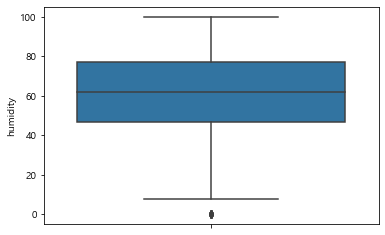

In [357]:
sns.boxplot(data = train_df , y = 'humidity')
plt.show()

In [358]:
train_df['humidity']=train_df[['humidity']].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

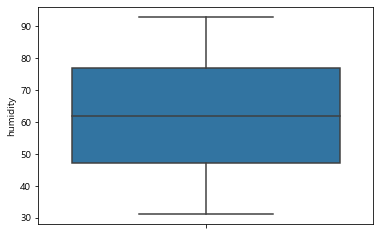

In [359]:
sns.boxplot(data = train_df , y = 'humidity')
plt.show()

windspeed 이상치 처리

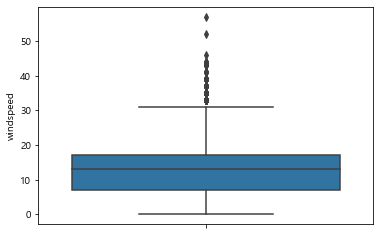

In [360]:
sns.boxplot(data = train_df , y = 'windspeed')
plt.show()

In [361]:
train_df['windspeed']=train_df[['windspeed']].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

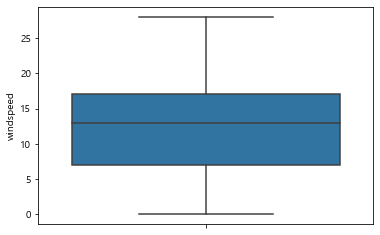

In [362]:
sns.boxplot(data = train_df[['windspeed']].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0), y = 'windspeed')
plt.show()

In [363]:
# 이상치가 많지 않아 IQR 사용

**Q5. 범주형 변수를 원하는 방식으로 처리하고 왜 그렇게 처리했는지 이유를 서술하세요. (8점)** 

In [364]:
# one hot encoding 사용-> 라벨 인코딩을 보완한 인코딩 방법 사용, 피처 내 종류가 많지 않아 진행

In [365]:
train_df.head(3)

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,count
0,2012,3,13,18,봄,0,1,"맑음, 약간 구름 낀 흐림",28.70,31.820,34.0,19.9995,638,734
1,2012,4,16,22,여름,1,0,"맑음, 약간 구름 낀 흐림",27.88,31.820,51.0,16.9979,179,214
2,2011,12,9,21,겨울,0,1,"맑음, 약간 구름 낀 흐림",12.30,16.665,75.0,0.0000,131,140


### season 변수 인코딩

In [366]:
train_df['season'].unique()

array(['봄', '여름', '겨울', '가을'], dtype=object)

In [367]:
train_df=pd.concat([train_df ,pd.get_dummies(train_df.season, prefix = 'season')], axis = 1)

In [368]:
test_df=pd.concat([test_df ,pd.get_dummies(test_df.season, prefix = 'season')], axis = 1)

In [369]:
train_df=train_df.drop(columns=['season'])
test_df=test_df.drop(columns=['season'])

### weather 변수 인코딩

In [370]:
test_df['weather'].unique()

array(['맑음, 약간 구름 낀 흐림', '안개, 안개 + 흐림', '가벼운 눈, 가벼운 비 + 천둥'], dtype=object)

In [371]:
train_df['weather'].unique()

array(['맑음, 약간 구름 낀 흐림', '안개, 안개 + 흐림', '가벼운 눈, 가벼운 비 + 천둥',
       '심한 눈/비, 천둥/번개'], dtype=object)

In [372]:
train_df=pd.concat([train_df ,pd.get_dummies(train_df.weather, prefix = 'weather')], axis = 1)
test_df=pd.concat([test_df ,pd.get_dummies(test_df.weather, prefix = 'weather')], axis = 1)

In [373]:
train_df=train_df.drop(columns=['weather'])
test_df=test_df.drop(columns=['weather'])

In [374]:
train_df.head()

,year,month,day,hour,holiday,workingday,temp,atemp,humidity,windspeed,registered,count,season_가을,season_겨울,season_봄,season_여름,"weather_가벼운 눈, 가벼운 비 + 천둥","weather_맑음, 약간 구름 낀 흐림","weather_심한 눈/비, 천둥/번개","weather_안개, 안개 + 흐림"
0,2012,3,13,18,0,1,28.70,31.820,34.0,19.9995,638,734,0,0,1,0,0,1,0,0
1,2012,4,16,22,1,0,27.88,31.820,51.0,16.9979,179,214,0,0,0,1,0,1,0,0
2,2011,12,9,21,0,1,12.30,16.665,75.0,0.0000,131,140,0,1,0,0,0,1,0,0
3,2011,8,8,19,0,1,33.62,37.120,43.0,7.0015,352,416,1,0,0,0,0,1,0,0
4,2011,10,4,7,0,1,17.22,21.210,82.0,19.0012,298,309,0,1,0,0,0,1,0,0


In [375]:
test_df['weather_심한 눈/비, 천둥/번개']=0

In [376]:
test_df.head()

,year,month,day,hour,holiday,workingday,temp,atemp,humidity,windspeed,registered,season_가을,season_겨울,season_봄,season_여름,"weather_가벼운 눈, 가벼운 비 + 천둥","weather_맑음, 약간 구름 낀 흐림","weather_안개, 안개 + 흐림","weather_심한 눈/비, 천둥/번개"
0,2011,10,7,20,0,1,22.14,25.760,49.0,0.0000,167,0,1,0,0,0,1,0,0
1,2011,4,4,14,0,1,30.34,32.575,27.0,32.9975,76,0,0,0,1,0,0,1,0
2,2012,2,18,7,0,0,9.84,14.395,70.0,0.0000,33,0,0,1,0,0,1,0,0
3,2012,5,12,3,0,0,19.68,23.485,59.0,0.0000,20,0,0,0,1,0,1,0,0
4,2012,5,12,6,0,0,17.22,21.210,67.0,6.0032,23,0,0,0,1,0,1,0,0


**Q6. 수치형 변수들의 분포를 확인하고 적절한 scaling 혹은 transform을 수행한 후, 왜 그렇게 처리했는지 이유를 서술하세요. (10점)** 

In [377]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

In [378]:
train_df.head()

,year,month,day,hour,holiday,workingday,temp,atemp,humidity,windspeed,registered,count,season_가을,season_겨울,season_봄,season_여름,"weather_가벼운 눈, 가벼운 비 + 천둥","weather_맑음, 약간 구름 낀 흐림","weather_심한 눈/비, 천둥/번개","weather_안개, 안개 + 흐림"
0,2012,3,13,18,0,1,28.70,31.820,34.0,19.9995,638,734,0,0,1,0,0,1,0,0
1,2012,4,16,22,1,0,27.88,31.820,51.0,16.9979,179,214,0,0,0,1,0,1,0,0
2,2011,12,9,21,0,1,12.30,16.665,75.0,0.0000,131,140,0,1,0,0,0,1,0,0
3,2011,8,8,19,0,1,33.62,37.120,43.0,7.0015,352,416,1,0,0,0,0,1,0,0
4,2011,10,4,7,0,1,17.22,21.210,82.0,19.0012,298,309,0,1,0,0,0,1,0,0


In [379]:
train_num = train_df[['temp','atemp','humidity','windspeed']]
test_num = test_df[['temp','atemp','humidity','windspeed']]

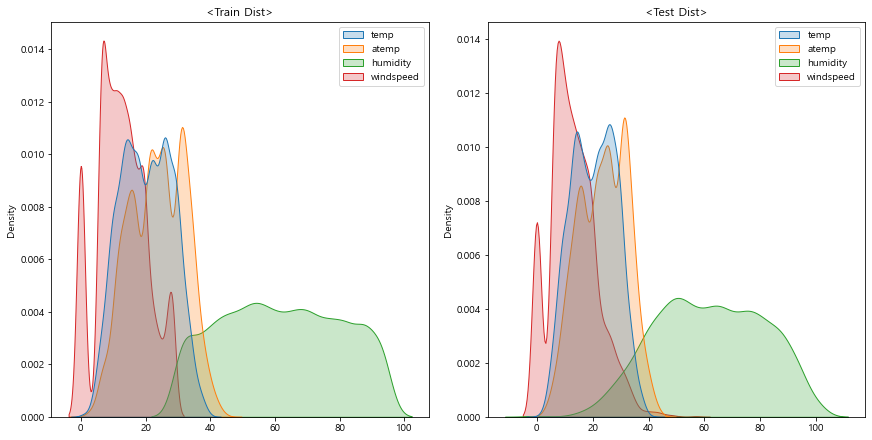

In [380]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6), constrained_layout=True)
sns.kdeplot(data = train_num, shade = True, ax = axes[0])
axes[0].set_title('<Train Dist>')

sns.kdeplot(data = test_num, shade = True, ax = axes[1])
axes[1].set_title('<Test Dist>')

plt.show()

In [381]:
scaler = MinMaxScaler()

train_df[['temp','atemp','humidity','windspeed']] = scaler.fit_transform(train_num)
test_df[['temp','atemp','humidity','windspeed']] = scaler.transform(test_num)

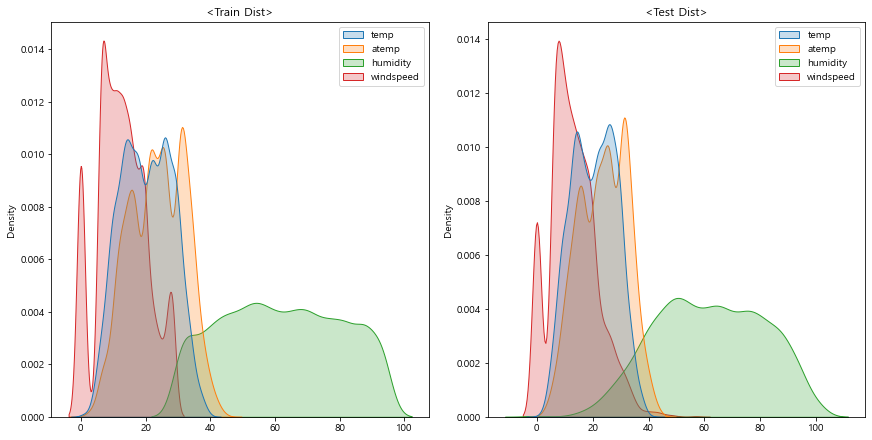

In [382]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6), constrained_layout=True)
sns.kdeplot(data = train_num, shade = True, ax = axes[0])
axes[0].set_title('<Train Dist>')

sns.kdeplot(data = test_num, shade = True, ax = axes[1])
axes[1].set_title('<Test Dist>')

plt.show()

In [383]:
# 개별 feature의 크기가 다 다르므로 모두 다 같은 단위로 조정

### transform

<AxesSubplot:ylabel='Count'>

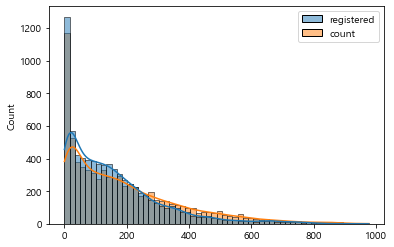

In [384]:
#왜곡되어있음

sns.histplot(data=train_df[['registered','count']],kde=True)

In [385]:
train_df['registered_log'] = np.log1p(train_df['registered'])
test_df['registered_log'] = np.log1p(test_df['registered'])

In [386]:
train_df['count_log'] = np.log1p(train_df['count'])

In [387]:
train_num = train_df[['registered','count','count_log','registered_log']]

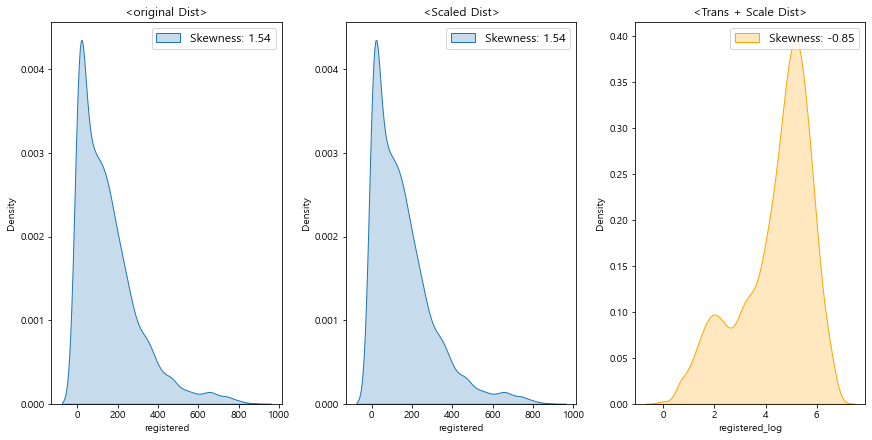

In [388]:
fig, axes = plt.subplots(1, 3, figsize = (12, 6), constrained_layout=True)


sns.kdeplot(data = train_df['registered'], shade = True, ax = axes[0], label = 'Skewness: {:.2f}'.format(train_df['registered'].skew()))
axes[0].set_title('<original Dist>')
axes[0].legend(fontsize = 12)

sns.kdeplot(data = train_num['registered'], shade = True, ax = axes[1], label = 'Skewness: {:.2f}'.format(train_num['registered'].skew()))
axes[1].set_title('<Scaled Dist>')
axes[1].legend(fontsize = 12)

sns.kdeplot(data = train_num['registered_log'], shade = True, ax = axes[2], label = 'Skewness: {:.2f}'.format(train_num['registered_log'].skew()),
           color='orange')
axes[2].set_title('<Trans + Scale Dist>')
axes[2].legend(fontsize = 12)

plt.show()

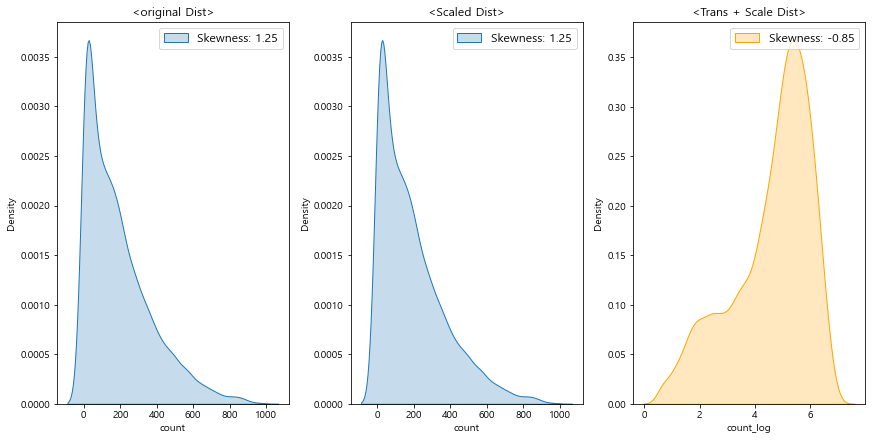

In [389]:
fig, axes = plt.subplots(1, 3, figsize = (12, 6), constrained_layout=True)


sns.kdeplot(data = train_df['count'], shade = True, ax = axes[0], label = 'Skewness: {:.2f}'.format(train_df['count'].skew()))
axes[0].set_title('<original Dist>')
axes[0].legend(fontsize = 12)

sns.kdeplot(data = train_num['count'], shade = True, ax = axes[1], label = 'Skewness: {:.2f}'.format(train_num['count'].skew()))
axes[1].set_title('<Scaled Dist>')
axes[1].legend(fontsize = 12)

sns.kdeplot(data = train_num['count_log'], shade = True, ax = axes[2], label = 'Skewness: {:.2f}'.format(train_num['count_log'].skew()),
           color='orange')
axes[2].set_title('<Trans + Scale Dist>')
axes[2].legend(fontsize = 12)

plt.show()

In [390]:
train_df= train_df.drop(columns=['registered','count'])
test_df= test_df.drop(columns=['registered'])

<AxesSubplot:ylabel='Count'>

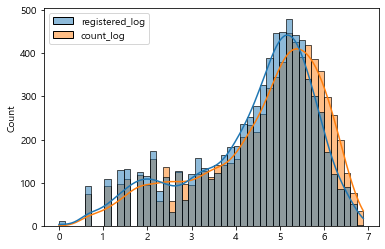

In [391]:
#왜곡되어있음

sns.histplot(data=train_df[['registered_log','count_log']],kde=True)

**Q7. 해당 데이터에 가장 적절한 PCA 방법을 적용하고 이유를 서술하세요. 만약, PCA가 필요없다고 판단했다면 그 근거를 적어주세요. (14점)** 

In [392]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       7620 non-null   int64  
 1   month                      7620 non-null   int64  
 2   day                        7620 non-null   int64  
 3   hour                       7620 non-null   int64  
 4   holiday                    7620 non-null   int64  
 5   workingday                 7620 non-null   int64  
 6   temp                       7620 non-null   float64
 7   atemp                      7620 non-null   float64
 8   humidity                   7620 non-null   float64
 9   windspeed                  7620 non-null   float64
 10  season_가을                  7620 non-null   uint8  
 11  season_겨울                  7620 non-null   uint8  
 12  season_봄                   7620 non-null   uint8  
 13  season_여름                  7620 non-null   uint8

In [393]:
train_countx=train_df.loc[:, train_df.columns != 'count_log']
train_counto= train_df.loc[:,train_df.columns == 'count_log']

In [394]:
train_counto

,count_log
0,6.599870
1,5.370638
2,4.948760
3,6.033086
4,5.736572
...,...
7615,3.367296
7616,4.787492
7617,5.257495
7618,5.645447


In [395]:
train_countx

,year,month,day,hour,holiday,workingday,temp,atemp,humidity,windspeed,season_가을,season_겨울,season_봄,season_여름,"weather_가벼운 눈, 가벼운 비 + 천둥","weather_맑음, 약간 구름 낀 흐림","weather_심한 눈/비, 천둥/번개","weather_안개, 안개 + 흐림",registered_log
0,2012,3,13,18,0,1,0.723404,0.694932,0.048387,0.714286,0,0,1,0,0,1,0,0,6.459904
1,2012,4,16,22,1,0,0.702128,0.694932,0.322581,0.607083,0,0,0,1,0,1,0,0,5.192957
2,2011,12,9,21,0,1,0.297872,0.355856,0.709677,0.000000,0,1,0,0,0,1,0,0,4.882802
3,2011,8,8,19,0,1,0.851064,0.813514,0.193548,0.250060,1,0,0,0,0,1,0,0,5.866468
4,2011,10,4,7,0,1,0.425532,0.457546,0.822581,0.678631,0,1,0,0,0,1,0,0,5.700444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,2011,1,15,0,0,0,0.170213,0.254167,0.387097,0.000000,0,0,1,0,0,1,0,0,3.258097
7616,2011,8,1,11,0,1,0.914894,0.847410,0.016129,0.392917,1,0,0,0,0,1,0,0,4.204693
7617,2012,2,5,22,0,0,0.255319,0.288064,0.467742,0.250060,0,0,1,0,0,1,0,0,5.209486
7618,2012,12,13,12,0,1,0.361702,0.355856,0.145161,0.607083,0,1,0,0,0,1,0,0,5.533389


In [396]:
#차원(피처)이 너무 많음 -> 차원 축소 필요
#feature selection 

In [397]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

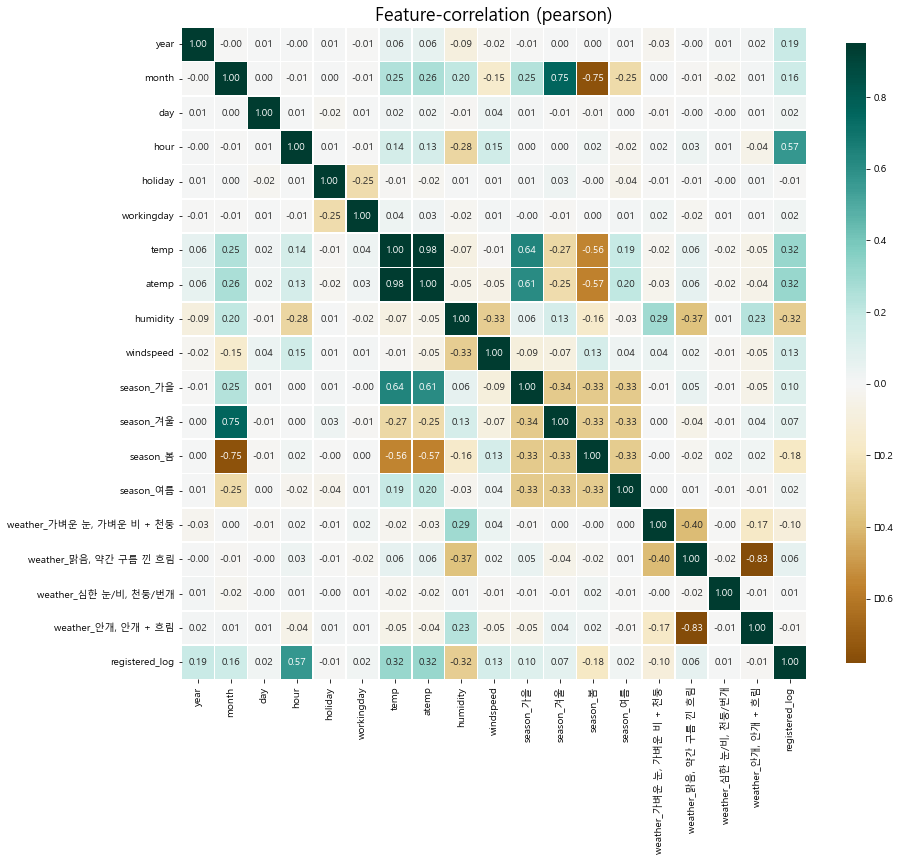

In [398]:
klib.corr_plot(data =train_countx, 
               target =train_counto,
               figsize = (14, 12))

plt.show()

In [399]:
#weather_안개,안개 + 흐림 과 weather 맑음, 약간 구름 낀 흐림이 -0.83으로 음의 상관관계가 높다고 판단
#피처 삭제

In [400]:
train_countx=train_countx.drop(columns=['weather_안개, 안개 + 흐림'])
test_df=test_df.drop(columns=['weather_안개, 안개 + 흐림'])

In [401]:
train_countx

,year,month,day,hour,holiday,workingday,temp,atemp,humidity,windspeed,season_가을,season_겨울,season_봄,season_여름,"weather_가벼운 눈, 가벼운 비 + 천둥","weather_맑음, 약간 구름 낀 흐림","weather_심한 눈/비, 천둥/번개",registered_log
0,2012,3,13,18,0,1,0.723404,0.694932,0.048387,0.714286,0,0,1,0,0,1,0,6.459904
1,2012,4,16,22,1,0,0.702128,0.694932,0.322581,0.607083,0,0,0,1,0,1,0,5.192957
2,2011,12,9,21,0,1,0.297872,0.355856,0.709677,0.000000,0,1,0,0,0,1,0,4.882802
3,2011,8,8,19,0,1,0.851064,0.813514,0.193548,0.250060,1,0,0,0,0,1,0,5.866468
4,2011,10,4,7,0,1,0.425532,0.457546,0.822581,0.678631,0,1,0,0,0,1,0,5.700444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,2011,1,15,0,0,0,0.170213,0.254167,0.387097,0.000000,0,0,1,0,0,1,0,3.258097
7616,2011,8,1,11,0,1,0.914894,0.847410,0.016129,0.392917,1,0,0,0,0,1,0,4.204693
7617,2012,2,5,22,0,0,0.255319,0.288064,0.467742,0.250060,0,0,1,0,0,1,0,5.209486
7618,2012,12,13,12,0,1,0.361702,0.355856,0.145161,0.607083,0,1,0,0,0,1,0,5.533389


In [402]:
test_df

,year,month,day,hour,holiday,workingday,temp,atemp,humidity,windspeed,season_가을,season_겨울,season_봄,season_여름,"weather_가벼운 눈, 가벼운 비 + 천둥","weather_맑음, 약간 구름 낀 흐림","weather_심한 눈/비, 천둥/번개",registered_log
0,2011,10,7,20,0,1,0.553191,0.559347,0.290323,0.000000,0,1,0,0,0,1,0,5.123964
1,2011,4,4,14,0,1,0.765957,0.711825,-0.064516,1.178512,0,0,0,1,0,0,0,4.343805
2,2012,2,18,7,0,0,0.234043,0.305068,0.629032,0.000000,0,0,1,0,0,1,0,3.526361
3,2012,5,12,3,0,0,0.489362,0.508446,0.451613,0.000000,0,0,0,1,0,1,0,3.044522
4,2012,5,12,6,0,0,0.425532,0.457546,0.580645,0.214405,0,0,0,1,0,1,0,3.178054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,2012,11,15,6,0,1,0.297872,0.305068,0.548387,0.607083,0,1,0,0,0,0,0,4.990433
3262,2011,4,15,21,1,0,0.404255,0.440653,0.725806,0.714286,0,0,0,1,0,0,0,4.356709
3263,2011,10,9,11,0,0,0.638298,0.677928,0.354839,0.214405,0,1,0,0,0,1,0,5.459586
3264,2011,12,7,18,0,1,0.404255,0.440653,0.861290,0.714286,0,1,0,0,1,0,0,3.891820


### pca

In [403]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_countx = scaler.fit_transform(train_countx)
test_df =scaler.transform(test_df)

In [404]:
from sklearn.decomposition import PCA
train_pca = PCA().fit(train_countx) 

In [405]:
np.cumsum(train_pca.explained_variance_ratio_)

array([0.18385237, 0.31429939, 0.41937032, 0.4989004 , 0.57335222,
       0.64228525, 0.70025719, 0.75605648, 0.81112446, 0.86037161,
       0.90183743, 0.93514012, 0.96095318, 0.98055354, 0.9973988 ,
       0.99915729, 1.        , 1.        ])

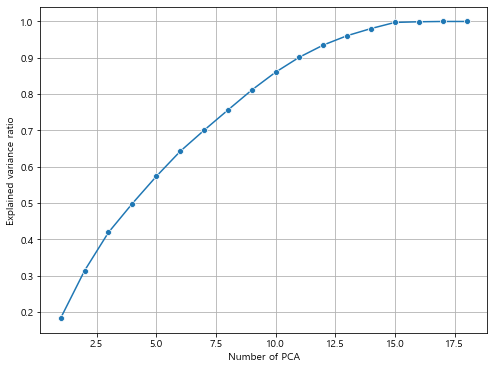

In [406]:
fig ,ax = plt.subplots(1,1, figsize = (8, 6))
sns.lineplot(np.arange(1,train_countx.shape[1]+1),np.cumsum(train_pca.explained_variance_ratio_), marker = 'o', ax=ax )
plt.grid()
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

In [195]:
# feature가 11개 정도 일 때 약 90% 정도 설명할 수 있다

In [412]:
pca=PCA(n_components= 11)

In [413]:
train_pca = pca.fit_transform(train_countx) 

In [415]:
test_df=pca.transform(test_df) 

**Q8. 적절한 모델을 선택하여 모델을 학습시키고 왜 해당 모델을 선택했는지 이유를 적어주세요. (11점)**

In [416]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [418]:
from sklearn.model_selection import train_test_split

y_target = train_counto
X_train, X_test, y_train, y_test = train_test_split(train_pca, y_target, test_size=0.2, random_state=42)

In [432]:
line_fitter = LinearRegression()
line_fitter.fit(X_train, y_train)
print(elasticnet.score(X_train,y_train))
print(elasticnet.score(X_test,y_test))

0.42901733535527165
0.42492412762712073


In [426]:
ridge=Ridge()
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.8112130368878826
-40.829724691106335


### Lasso 모델이 가장 높게 나옴

In [427]:
lasso=Lasso()
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.09188886458908241
0.09346828028962806


In [430]:
elasticnet=ElasticNet()
elasticnet.fit(X_train,y_train)
print(elasticnet.score(X_train,y_train))
print(elasticnet.score(X_test,y_test))

0.42901733535527165
0.42492412762712073


In [434]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9846199511569907
0.8843997348531821


In [435]:
# lasso 모델이 가장 높게 나왔다.

In [436]:
lasso=Lasso()
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.09188886458908241
0.09346828028962806


**Q9. 하이퍼 파라미터 튜닝을 수행하고 전, 후 성능을 적어주세요. (14점)**

In [487]:
from sklearn.model_selection import RandomizedSearchCV

model_dt = RandomForestRegressor(random_state = 42)

param_grid = {#'criterion' :['gini','entropy'], 
              'max_depth':[4,5,6,8,10],  
              'min_samples_leaf':[3,5,10,50,100]}  

rcv = RandomizedSearchCV(model_dt, param_distributions=param_grid, 
                         n_iter=8) # 8 번 반복
rcv.fit(X_train,y_train)

print('final params', rcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', rcv.best_score_)      # 최고의 점수
print(rcv.score(X_test,y_test))           # # 튜닝 하기 전보다 높은 수치

final params {'min_samples_leaf': 3, 'max_depth': 10}
best score 0.8614535557717169
0.8578884614610809
